# Spacy

## Basic

### Introduction

**SpaCy** là một thư viện xử lý ngôn ngữ tự nhiên mã nguồn mở cho Python. Nó được thiết kế để thực hiện xử lý ngôn ngữ tự nhiên. **SpaCy** cung cấp các mô hình được đào tạo trước cho **nhiều ngôn ngữ** và nó nổi tiếng với **tốc độ và hiệu suất** của mình khi xử lý lượng **văn bản lớn**.

- here: https://spacy.io/usage

**Các tính năng**

- **Tách token (Tokenization)**: SpaCy có thể phân đoạn văn bản thành từ hoặc đơn vị con từ, giúp dễ dàng phân tích và xử lý các yếu tố ngôn ngữ.
- **POS-Tagging**: Gán các loại (ví dụ: danh từ, động từ, tính từ) cho mỗi từ trong một câu.
- **Nhận dạng thực thể tên thực thể ( Name Entity Recognition - NER)**: SpaCy có thể xác định và phân loại các thực thể như người, tổ chức, địa điểm, ngày tháng và nhiều hơn nữa trong một đoạn văn bản cho trước.
- **Phân tích phụ thuộc (Dependency Parsing)**: Nó phân tích cấu trúc ngữ pháp của một câu, xác định mối quan hệ giữa các từ và phụ thuộc ngữ pháp của chúng.
- **Lemmatization**: SpaCy có thể giảm các từ về gốc ví dụ running từ gốc là run , điều này hữu ích cho các nhiệm vụ như chuẩn hóa văn bản.
- **Vector hóa từ**: SpaCy cung cấp các vector từ đã được đào tạo trước có thể được sử dụng cho các nhiệm vụ như tính toán độ tương đồng và phân cụm tài liệu.
- **Tùy chỉnh**: Người dùng có thể đào tạo các mô hình riêng của họ bằng cách sử dụng SpaCy cho các lĩnh vực hoặc ngôn ngữ cụ thể.

**Kiến trúc Spacy**

<img src="_images/architecture.svg">

- Lớp **Language**: Lớp này sử dụng để xử lý văn bản và chuyển thành đối tượng Doc. Biến sử dụng là `nlp` 
- Lớp **Vocab**: Vector của từ và các thuộc tính từ vựng nằm bên trong **Vocab**
- Lớp **Doc**: Đối tượng Doc chứa chuỗi tokens và nhãn tương ứng.

### Install

In [ ]:
!pip install spacy

- download English package: **small English model**

In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 4.2 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 17.8 MB/s eta 0:00:01
     ------------------------------------ -- 12.1/12.8 MB 24.4 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 19.3 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 16.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Tiếng việt

In [ ]:
!pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/vi_core_news_lg/dist/vi_core_news_lg-0.0.1.tar.gz

- load spacy and model.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

## Concept

### spaCy bject

**Spacy object** containing the processing pipeline (`nlp`), it contains all the different components in the pipeline for language-specific rules

In [17]:
import spacy

# load pretrain pipeline
nlp = spacy.load("en_core_web_sm")

# or create a blank English pipeline for tokenizing the text into words and punctuation
nlp = spacy.blank("en")

**Doc object** – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

In [18]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


In [19]:
# Index into the Doc to get a single Token
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

world


**Span object**

A Span object is a slice of the document consisting of one or more tokens. It's only a view of the Doc and doesn't contain any data itself.

![](https://course.spacy.io/doc_span.png)

In [20]:
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:3]

# Get the span text via the .text attribute
print(span.text)

world!


**Lexical Attributes**

These **attributes** are also called **lexical attributes**: they refer to the **entry in the vocabulary** and **don't depend on the token's context**.

In [22]:
doc = nlp("It costs $5.")


print("Text:    ", [token.text for token in doc])
print("Index:   ", [token.i for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Text:     ['It', 'costs', '$', '5', '.']
Index:    [0, 1, 2, 3, 4]
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


### trained pipeline

- Models that enable spaCy to predict linguistic attributes in context
    - Part-of-speech tags
    - Syntactic dependencies
    - Named entities
- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions

In [ ]:
python -m spacy download en_core_web_sm

In [23]:
import spacy

# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


**Syntactic Dependencies**

- The `.dep_` attribute returns the predicted dependency label.
- The `.head` attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [24]:
# Syntactic Dependencies
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


![](https://course.spacy.io/dep_example.png)

**Named Entities**

It returns an iterator of **Span** objects, so we can print the entity text and the entity label using the `.label_` attribute.

In [25]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [29]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ccomp     
official    NOUN      attr      
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


![](https://course.spacy.io/ner_example.png)

**Tips: Explain**

 To get definitions for the most common tags and labels, you can use the `spacy.explain` helper function.

In [26]:
spacy.explain("GPE")

'Countries, cities, states'

In [27]:
spacy.explain("NNP")

'noun, proper singular'

In [28]:
spacy.explain("dobj")

'direct object'

### Rule-based matching

It is not only just regular expressions, because:
- Match on Doc objects, not just strings
- Match on tokens and token attributes
- Use a model's predictions
> Example: "duck" (verb) vs. "duck" (noun) --> find the word "duck" only if it's a verb, not a noun.


**Match pattern**: Lists of dictionaries, one per token
- Match exact token texts : `[{"TEXT": "iPhone"}, {"TEXT": "X"}]`
- Match lexical attributes : `[{"LOWER": "iphone"}, {"LOWER": "x"}]`
- Match any token attributes : `[{"LEMMA": "buy"}, {"POS": "NOUN"}]`

In [31]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


**operators and quantifiers **
- `"OP"` can have one of four values:
- `"!"` negates the token, so it's matched 0 times.
- `"?"` makes the token optional, and matches it 0 or 1 times.
- `"+"` matches a token 1 or more times.
- `"*"` matches 0 or more times.

When **iter** the matches:
- `match_id`: hash value of the pattern name
- `start`: start index of matched span
- `end`: end index of matched span

In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True},
]

doc = nlp("2018 FIFA World Cup: France won!")

### Linguistic Annotations & Token Detection

In [4]:
text = """The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.
Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies established along the East Coast. Disputes over taxation and political representation with Great Britain led to the American Revolutionary War (1775â€“1783), which established independence. In the late 18th century, the U.S. began expanding across North America, gradually obtaining new territories, sometimes through war, frequently displacing Native Americans, and admitting new states; by 1848, the United States spanned the continent. Slavery was legal in the southern United States until the second half of the 19th century when the American Civil War led to its abolition. The Spanishâ€“American War and World War I established the U.S. as a world power, a status confirmed by the outcome of World War II.
During the Cold War, the United States fought the Korean War and the Vietnam War but avoided direct military conflict with the Soviet Union. The two superpowers competed in the Space Race, culminating in the 1969 spaceflight that first landed humans on the Moon. The Soviet Union's dissolution in 1991 ended the Cold War, leaving the United States as the world's sole superpower.
The United States is a federal republic and a representative democracy with three separate branches of government, including a bicameral legislature. It is a founding member of the United Nations, World Bank, International Monetary Fund, Organization of American States, NATO, and other international organizations. It is a permanent member of the United Nations Security Council. Considered a melting pot of cultures and ethnicities, its population has been profoundly shaped by centuries of immigration. The country ranks high in international measures of economic freedom, quality of life, education, and human rights, and has low levels of perceived corruption. However, the country has received criticism concerning inequality related to race, wealth and income, the use of capital punishment, high incarceration rates, and lack of universal health care.
The United States is a highly developed country, accounts for approximately a quarter of global GDP, and is the world's largest economy. By value, the United States is the world's largest importer and the second-largest exporter of goods. Although its population is only 4.2% of the world's total, it holds 29.4% of the total wealth in the world, the largest share held by any country. Making up more than a third of global military spending, it is the foremost military power in the world; and it is a leading political, cultural, and scientific force internationally.[23]"""

#### Container
**Container** is spaCy Object that contain **a large data of text**.

**Type of container:**
- Doc
- DocBin
- Example
- Language
- Lexeme
- Span
- SpanGroup
- Token

![](https://spacy.pythonhumanities.com/_images/spacy_containers.png)

- At the top, we have a **Doc container** that are many different attributes and subcontainers
- One attribute (subcontainer) is the Doc.sents, which contains all the sentences in the Doc container
- Span containers are kind of like token, in that they are a piece of a Doc container. Spans have one thing that makes them unique. They can cross multiple tokens.

**Doc container**

Each component in doc container can call as a token. Tokens are a fundamental building block of spaCy or any NLP framework

In [16]:
# create doc container
doc = nlp(text)

# ascess to work-level token
for idx, token in enumerate(doc[:10]):
    print(f"index {idx}: '{token.text}' ", token.pos_, token.dep_)

index 0: 'The'  DET det
index 1: 'United'  PROPN compound
index 2: 'States'  PROPN nsubj
index 3: 'of'  ADP prep
index 4: 'America'  PROPN pobj
index 5: '('  PUNCT punct
index 6: 'U.S.A.'  PROPN appos
index 7: 'or'  CCONJ cc
index 8: 'USA'  PROPN conj
index 9: ')'  PUNCT punct


#### Sentence Boundary Detection (SBD)

The **identification of sentences in a text**

In [17]:
# sentence level token

limit = 5
idx = 0
for sent in doc.sents:
    idx += 1
    print(f"sen {idx}: ", sent)
    if idx == limit:
        break

sen 1:  The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
sen 2:  It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
sen 3:  At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
sen 4:  The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world.
sen 5:  The national capital is Washington, D.C., and the most populous city is New York.



#### Token attributes

Some popular token attributes, such as:

In [30]:
sentence1 = list(doc.sents)[0]
token2 = sentence1[2]

In [37]:
# Sentence:
print(f"{sentence1}", end=f"\n\n---Token 2: '{token2}'---\n\n")

# `.text` (Text): show token content
print(f"* Text: '{token2.text}'")

# `.head` (Head): token nào được thực hiện bởi token gốc
# xác định từ chính (head) của token2, token2 bị phụ thuộc vào head
print(f"* Head: '{token2.head}'")

# `.left_edge` (Left Edge): Xác định token độc lập phía trước (**không nằm cùng multi-word token của token raw**), từ đó xác định vị trí bắt đầu của token raw
print(f"* Left Edge: '{token2.left_edge}'")

# `.right_edge` (Right Edge): Xác định vị trí kết thúc của **multi-word token**
print(f"* Right Edge: '{token2.right_edge}'")

# `.children` (Children): Xác định các token phụ thuộc vào token raw
# khi này token2 là head của các token phụ thuộc
print(f"* Children: {[child for child in token2.children]}")

# `.ent_type_` (Entity Type): Xác định loại entity của token
print(f"* Entity Type: '{token2.ent_type_}'")

# `.ent_iob_` (Entity Inside/Outside/Beginning): Xác định vị trí của token trong entity
# entity: chuỗi các token liên tiếp nhau
print(f"* Entity IOB: '{token2.ent_iob_}'")

# `.lemma_` (Lemma): Xác định từ gốc của token
print(f"* Lemma: '{token2.lemma_}'")

# `.morph` (Morphology): Xác định thông tin về hình thái của token
print(f"* Morph: '{token2.morph}'")

# `.norm_` (Normalization): Xác định dạng chuẩn của token
print(f"* Normalization: '{token2.norm_}'")

# `.pos_` (Part of Speech): Xác định loại từ của token
print(f"* POS: '{token2.pos_}'")

# `.dep_` (Dependency): Xác định mối quan hệ phụ thuộc của token
print(f"* Dependency: '{token2.dep_}'")

# `.lang_` (Language): Xác định ngôn ngữ của token
print(f"* Language: '{token2.lang_}'")


The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.

---Token 2: 'States'---

* Text: 'States'
* Head: 'is'
* Left Edge: 'The'
* Right Edge: ','
* Children: [The, United, of, ), ,, known, ,]
* Entity Type: 'GPE'
* Entity IOB: 'I'
* Lemma: 'States'
* Morph: 'Number=Sing'
* Normalization: 'states'
* POS: 'PROPN'
* Dependency: 'nsubj'
* Language: 'en'


### Part of Speech Tagging (POS)

**A. Ý nghĩa của việc phân tích POS trong NLP**

***1. Hiểu cấu trúc ngôn ngữ***

- Mỗi từ trong câu có một vai trò ngữ pháp và ý nghĩa ngữ dụng khác nhau (danh từ, động từ, tính từ, trạng từ, v.v.).
- Việc nhận diện chính xác POS giúp mô hình “hiểu” được bối cảnh cơ bản về cấu trúc, từ đó cải thiện độ chính xác trong các tác vụ phức tạp hơn (như phân tích ngữ nghĩa, nhận diện thực thể, trích chọn thông tin,...).

***2. Cải thiện chất lượng cho các bài toán NLP***

- Tách từ (tokenization) và gắn nhãn POS thường là bước xử lý đầu tiên trong pipeline NLP, làm đầu vào cho các bài toán khác như phân tích cú pháp (parsing), phân loại văn bản, sinh ngôn ngữ (text generation), hay dịch máy (machine translation).
- POS tags giúp mô hình nắm rõ loại từ, từ đó giảm nhiễu, đặc biệt quan trọng với các ngôn ngữ giàu hình thái (như tiếng Việt có hiện tượng biến đổi dấu câu, hoặc tiếng Anh có dạng số ít/số nhiều,…).

***3. Tiết kiệm tài nguyên huấn luyện***

- Có thông tin POS, mô hình có thể “kế thừa” một phần tri thức ngôn ngữ mang tính quy tắc, thay vì phải tự học từ đầu tất cả các hiện tượng ngôn ngữ qua dữ liệu “thô”.
- Giảm gánh nặng cho mô hình khi phải “học” quá nhiều, nhất là đối với các mô hình nhỏ, dữ liệu ít.

---

**B. Thời điểm và trường hợp cần sử dụng POS**

***1. Phân tích cú pháp (Syntax Parsing)***

- Kết quả của POS sẽ được dùng trực tiếp để xây dựng cây phân tích cú pháp, định hướng mô hình phân tích xem từ nào làm chủ ngữ, động từ nào là vị ngữ, bổ ngữ ở đâu, v.v.

***Các bài toán suy luận ngôn ngữ***

- Gán nhãn POS giúp bóc tách vai trò ngữ pháp, hỗ trợ mô hình suy luận logic/phân tích ý nghĩa.
> Ví dụ, khi áp dụng POS trong chatbot hoặc QA system, mô hình sẽ nhận diện động từ chính (main verb) để xác định hành động trong câu, hoặc tìm danh từ chính để xác định đối tượng, từ đó cải thiện độ chính xác.

***Trích xuất từ khóa, tóm tắt văn bản***

- Trong trích xuất các cụm từ quan trọng, đôi khi ta ưu tiên tập trung vào danh từ, tính từ hay động từ đặc thù. Sử dụng POS tag giúp lọc nhanh những từ có ý nghĩa chính.
***Tiền xử lý cho Named Entity Recognition (NER)***

- Phân tích POS song song với phân tích thực thể để mô hình không nhầm lẫn giữa danh từ riêng (tên người, địa danh) và danh từ chung.

***Khi làm việc với các ngôn ngữ nhiều biến đổi (rich morphology)***

- Như tiếng Việt có hiện tượng từ đa nghĩa thay đổi vai trò dựa trên dấu hay vị trí trong câu, tiếng Pháp, tiếng Đức, tiếng Nga, v.v. Nắm bắt POS kèm đặc trưng hình thái (ngôi, số, thời, giống đực/cái,…) là rất quan trọng.

Tuy nhiên, trong một số mô hình ngôn ngữ hiện đại (như BERT, GPT, Transformer-based models), quá trình huấn luyện end-to-end trên lượng dữ liệu lớn **có thể “ngầm” học được POS**. **Vẫn có những tình huống không nhất thiết bắt buộc gắn nhãn POS thủ công**, mà sử dụng luôn mô hình pretrained. Song, nếu có POS, quá trình fine-tuning hoặc các bước hậu xử lý vẫn được hưởng lợi rõ rệt.

----

**C. Best Practices khi phân tích POS**

***1. Chọn hoặc xây dựng bộ gán nhãn phù hợp***

- Tuân theo chuẩn như Penn Treebank Tagset, Universal Dependencies (UD), hoặc bộ tagset chuẩn hóa của ngôn ngữ cụ thể (VD: VnTreeBank cho tiếng Việt).
- Mức độ chi tiết của bộ tag (chỉ POS cơ bản hay kèm attributes mở rộng) nên thống nhất xuyên suốt dự án.

***2. Sử dụng mô hình POS hiện đại (neural network-based)***

- Nếu có điều kiện, nên sử dụng mô hình gán nhãn POS dựa trên mạng LSTM/CRF hoặc Transformer-based đã pretrained (chẳng hạn spaCy, Stanza, hay VnCoreNLP cho tiếng Việt).
- Độ chính xác có thể cao hơn nhiều so với các phương pháp dựa trên quy tắc (rule-based) hay HMM cũ.

***3. Huấn luyện trên dữ liệu đa dạng, có chất lượng***

- Dữ liệu huấn luyện POS cần được gán nhãn thủ công chuẩn, thể hiện đầy đủ các kiểu câu, bối cảnh, phong cách ngôn ngữ.
- Tránh hiện tượng “overfitting” vào một domain hoặc văn phong hẹp (ví dụ chỉ có tin tức báo chí, thiếu văn bản mạng xã hội, thiếu văn bản chính thống,…).

***4. Kiểm tra và hiệu chỉnh liên tục (error analysis)***

- Xác định các loại lỗi thường gặp (ví dụ: từ đồng hình đồng âm – “chạy” vừa là động từ, vừa có thể hiểu khác trong ngữ cảnh nào đó).
- Điều chỉnh mô hình (thêm dữ liệu, tăng cường quy tắc, bổ sung tính năng ngữ cảnh) để cải thiện.

***5. Cân nhắc việc tinh chỉnh POS cho bài toán cụ thể***

- Nếu bài toán phân loại văn bản chỉ quan tâm đến danh từ, động từ, tính từ, có thể gộp một số thẻ tương tự nhau để giảm độ phức tạp.
- Nếu bài toán yêu cầu chi tiết dạng “danh từ số ít/số nhiều” hoặc “động từ nguyên mẫu/đã chia thì”, nên giữ lại thông tin đầy đủ.

***6. Kết hợp gắn nhãn POS với các bước tiền xử lý khác***

- Đồng thời làm sạch dữ liệu (remove stop words, lowercasing – tùy ngôn ngữ, tách từ, tách câu,…).
- Bước POS tagging thường đi cùng với lemmatization (quy về dạng gốc) hoặc stemming (cắt bỏ đuôi) ở một số ngôn ngữ. Nên lựa chọn cẩn thận cách thức phù hợp.

***7. Luôn xem xét bối cảnh mô hình ngôn ngữ lớn***

- Với các mô hình Transformer-based pretrained (BERT, GPT, v.v.), thông tin POS có thể được “học ngầm”, do đó đôi khi không nhất thiết cần POS thủ công.
- Tuy nhiên, nếu dữ liệu hạn chế hoặc cần tách bạch cú pháp rõ ràng, POS vẫn rất hữu ích (chẳng hạn, chạy QA hoặc NER trên tài liệu chuyên ngành).

---

**D. Universal POS tags**

1. **ADJ (Adjective - Tính từ)**: Từ mô tả đặc điểm, tính chất của danh từ.
   - *Ví dụ*: "đẹp", "cao", "nhanh".
2. **ADP (Adposition - Giới từ/Trợ từ)**: Từ nối danh từ, đại từ hoặc cụm danh từ với phần còn lại của câu.
   - *Ví dụ*: "trong", "trên", "với".
3. **ADV (Adverb - Trạng từ)**: Từ bổ nghĩa cho động từ, tính từ hoặc trạng từ khác, thường chỉ cách thức, thời gian, mức độ.
   - *Ví dụ*: "nhanh chóng", "rất", "đã".
4. **AUX (Auxiliary verb - Trợ động từ)**: Động từ hỗ trợ cho động từ chính để diễn tả thì, thể, giọng.
   - *Ví dụ*: "đã", "đang", "sẽ".
5. **CCONJ (Coordinating conjunction - Liên từ kết hợp)**: Từ nối các từ, cụm từ hoặc mệnh đề độc lập.
   - *Ví dụ*: "và", "hoặc", "nhưng".
6. **DET (Determiner - Từ hạn định)**: Từ đứng trước danh từ để xác định rõ danh từ đó.
   - *Ví dụ*: "một", "những", "các".
7. **INTJ (Interjection - Thán từ)**: Từ biểu lộ cảm xúc, thường đứng độc lập.
   - *Ví dụ*: "ôi", "chao", "chà".
8. **NOUN (Noun - Danh từ)**: Từ chỉ người, sự vật, hiện tượng, khái niệm.
   - *Ví dụ*: "học sinh", "cây cối", "tình yêu".
9. **NUM (Numeral - Số từ)**: Từ chỉ số lượng, thứ tự.
   - *Ví dụ*: "một", "hai", "thứ nhất".
10. **PART (Particle - Tiểu từ)**: Từ không thuộc các loại từ chính nhưng có chức năng ngữ pháp.
    - *Ví dụ*: "à", "ừ", "nhé".
11. **PRON (Pronoun - Đại từ)**: Từ thay thế cho danh từ hoặc cụm danh từ.
    - *Ví dụ*: "tôi", "bạn", "chúng ta".
12. **PROPN (Proper noun - Danh từ riêng)**: Tên riêng của người, địa điểm, tổ chức.
    - *Ví dụ*: "Hà Nội", "Việt Nam", "Google".
13. **PUNCT (Punctuation - Dấu câu)**: Ký hiệu dùng để ngắt câu, đoạn.
    - *Ví dụ*: ".", ",", "!".
14. **SCONJ (Subordinating conjunction - Liên từ phụ thuộc)**: Từ nối mệnh đề phụ thuộc với mệnh đề chính.
    - *Ví dụ*: "khi", "nếu", "bởi vì".
15. **SYM (Symbol - Ký hiệu)**: Ký hiệu, biểu tượng.
    - *Ví dụ*: "$", "%", "&".
16. **VERB (Verb - Động từ)**: Từ diễn tả hành động, trạng thái của chủ thể.
    - *Ví dụ*: "chạy", "nghĩ", "yêu".
17. **X (Other - Khác)**: Từ không thuộc các loại trên, thường là từ vay mượn, từ mới.
18. **SPACE (Space - Khoảng trắng)**: Ký tự khoảng trắng, dùng để tách các từ trong câu.

---

**E. Mối quan hệ phụ thuộc với `head` khi sử dụng thuộc tính `.dep_`**

1. **`nsubj` (nominal subject)**: Chủ ngữ danh từ của động từ "looking" là "Apple".​
2. **`aux` (auxiliary)**: Trợ động từ "is" hỗ trợ cho động từ chính "looking".​
3. **`ROOT`**: Động từ chính của câu là "looking".​
4. **`prep` (prepositional modifier)**: Giới từ "at" bổ nghĩa cho động từ "looking".​
5. **`pcomp` (prepositional complement)**: Động từ "buying" là bổ ngữ của giới từ "at".​
6. **`compound`**: "U.K." là phần bổ nghĩa cho danh từ "startup".​
7. **`dobj` (direct object)**: Tân ngữ trực tiếp của động từ "buying" là "startup".​
8. **`quantmod` (quantifier modifier)**: "$" là bổ ngữ định lượng cho "billion".​
9. **`pobj` (object of preposition)**: Danh từ "billion" là tân ngữ của giới từ "for".​
10. **`punct` (punctuation)**: Dấu chấm câu.


In [36]:
for token in sentence1[:5]:
    print(token.text, token.pos_, token.dep_)

The DET det
United PROPN compound
States PROPN nsubj
of ADP prep
America PROPN pobj


In [38]:
from spacy import displacy

displacy.render(sentence1, style="dep")

### Named Entity Recognition

In [40]:
for ent in doc.ents[:5]:
    print(ent.text, ent.label_)

The United States of America GPE
USA GPE
the United States GPE
U.S. GPE
US GPE


Sometimes it can be difficult to read this output as raw data. In this case, we can again leverage spaCy's displaCy feature. Notice that this time we are altering the keyword argument, style, with the string "ent". This tells displaCy to display the text as NER annotations

In [41]:
displacy.render(doc[:100], style="ent")

## Data analysis

### Data Structure

![](https://course.spacy.io/vocab_stringstore.png)

- `Doc` contains words in context: POS, dependencies, ...
- Each token refers to a `lexeme`, which knows the word's hash ID
- `string store` is string representation of the word

**1. Vocab**
- **Vocab**: stores data shared across multiple documents
- To save memory, spaCy encodes all strings to **hash values**. **Hashes** can't be reversed – that's why we need to provide the shared vocab
- **Strings** are only stored once in the **StringStore** via `nlp.vocab.strings`
- **String store**: lookup table in both directions


In [33]:
# Add a custom string to the vocab
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

print(coffee_hash, coffee_string)

3197928453018144401 coffee


In [39]:
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]
print(string)

coffee


- Look up the string and hash in `nlp.vocab.strings`

In [37]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


- The **doc** also exposes the **vocab and strings**

In [38]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


**2. Lexemes**

Entries in the vocabulary. Contains the context-independent information about a word
- **Word text**: lexeme.text and lexeme.orth (the hash)
- **Lexical attributes** like `lexeme.is_alpha`
- Lexemes **don't have context-dependent** (part-of-speech tags, dependencies or entity labels).

In [40]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


In [42]:
# check POS
lexeme.pos_

AttributeError: 'spacy.lexeme.Lexeme' object has no attribute 'pos_'

**3. Doc**

The Doc is one of the central data structures in spaCy. 
- It's created automatically when you process a text with the `nlp` object. `doc = nlp("I love coffee")`
- But you can also instantiate the class manually.

In [ ]:
# Create an nlp object
import spacy

# Import the Doc class
from spacy.tokens import Doc

nlp = spacy.blank("en")

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

**4. Span**

**Span** is a slice of a doc consisting of one or more tokens.
- This can add to `doc.ents` with a list of spans

![](https://course.spacy.io/span_indices.png)



In [45]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

**Doc** and **Span** are very powerful and hold references and relationships of **words** and **sentences**
- Convert result to strings as late as possible
- Use token attributes if available – for example, `token.i` for the token index

In [47]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            result = token.text
            print("Found proper noun before a verb:", result)

Found proper noun before a verb: Berlin


### Word vectors & similarity

**1. Semantic similarity**

Do lường mức độ giống nhau về ý nghĩa giữa hai đoạn văn bản (từ, cụm từ hoặc tài liệu). Trong spaCy, phương thức `.similarity()` có sẵn cho các đối tượng **Doc**, **Span** và **Token**, trả về **simility score (từ 0 đến 1)**, trong đó 1 biểu thị ý nghĩa giống hệt và 0 biểu thị không có sự tương đồng.

- **Word Vectors**: spaCy sử dụng word vectors—multi-dimensional numerical representations of words, để xác định sự tương đồng ngữ nghĩa. ác vectors này được tạo ra bằng cách sử dụng các thuật toán như **Word2Vec** và được huấn luyện trên các tập văn bản lớn để nắm bắt các sắc thái ngữ cảnh của từ.
- **Vectors của Doc và Span**: Đối với các đối tượng **Doc** và **Span**, spaCy tính toán vectors bằng cách lấy trung bình các vectors của các tokens thành phần. Điều này có nghĩa là vector cho một cụm từ như "thức ăn nhanh" là trung bình của các vectors cho "thức ăn" và "nhanh". Tuy nhiên, cách tiếp cận này có thể không luôn nắm bắt được ý nghĩa thực sự của các biểu thức nhiều từ, vì ý nghĩa kết hợp không chỉ đơn giản là tổng của các phần.​
- **Pipeline phu hop**: that has a word vector pipe: ✅ en_core_web_md (medium), ✅ en_core_web_lg (large), 🚫 NOT en_core_web_sm (small)
- **Tương đồng Cosine**: Mặc định, spaCy tính toán sự tương đồng bằng cách sử dụng tương đồng **cosine**, đo lường **cosine của góc giữa hai vectors**. Tương đồng cosine bằng 1 ngụ ý rằng các vectors có cùng hướng, biểu thị sự tương đồng cao, trong khi giá trị gần 0 ngụ ý sự tương đồng thấp.
- **Short phrases are better** than long documents with many irrelevant words. Các cụm từ hoặc câu ngắn hơn thường mang lại đánh giá sự tương đồng chính xác hơn so với các tài liệu dài hơn. Các văn bản dài hơn có thể chứa nhiều chủ đề hoặc từ không liên quan có thể làm loãng điểm số tương đồng tổng thể.

In [57]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_lg")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204298973083


In [58]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.7369546294212341


In [52]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.2274085134267807


In [53]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.5528544783592224


In [59]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501447677612305


**2. Word vectors**

**Word vectors** are vectors that depict the meaning of words in multiple dimensions.

In [54]:
doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[-0.6334     0.18981   -0.53544   -0.52658   -0.30001    0.30559
 -0.49303    0.14636    0.012273   0.96802    0.0040354  0.25234
 -0.29864   -0.014646  -0.24905   -0.67125   -0.053366   0.59426
 -0.068034   0.10315    0.66759    0.024617  -0.37548    0.52557
  0.054449  -0.36748   -0.28013    0.090898  -0.025687  -0.5947
 -0.24269    0.28603    0.686      0.29737    0.30422    0.69032
  0.042784   0.023701  -0.57165    0.70581   -0.20813   -0.03204
 -0.12494   -0.42933    0.31271    0.30352    0.09421   -0.15493
  0.071356   0.15022   -0.41792    0.066394  -0.034546  -0.45772
  0.57177   -0.82755   -0.27885    0.71801   -0.12425    0.18551
  0.41342   -0.53997    0.55864   -0.015805  -0.1074    -0.29981
 -0.17271    0.27066    0.043996   0.60107   -0.353      0.6831
  0.20703    0.12068    0.24852   -0.15605    0.25812    0.007004
 -0.10741   -0.097053   0.085628   0.096307   0.20857   -0.23338
 -0.077905  -0.030906   1.0494     0.55368   -0.10703    0.052234
  0.43407   -0.13926    0

**3. Vietnamese**

In [ ]:
pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/packages/vi_core_news_lg-3.6.0/dist/vi_core_news_lg-3.6.0.tar.gz

In [ ]:
import spacy

nlp = spacy.load("vi_spacy_model")
doc = nlp("Cộng đồng xử lý ngôn ngữ tự nhiên")

In [ ]:
import underthesea as uts

text = "Học sinh học sinh học."


### RegEx matcher

Trong spaCy, Regular Expressions (Regex) được sử dụng chủ yếu trong Matcher để tìm kiếm các mẫu cụ thể trong văn bản. spaCy không có một hệ thống Regex riêng, nhưng nó hỗ trợ Regex thông qua các công cụ như:

- **Token-based Matching**: Dùng để tìm mẫu dựa trên đặc điểm của token.
- **PhraseMatcher**: Dùng để khớp cụm từ cố định.
- **RegexMatcher** (chưa có trong spaCy gốc, nhưng có thể sử dụng qua Python re).
- **DependencyMatcher**: Dùng để tìm mẫu dựa trên quan hệ cú pháp

In [ ]:
from spacy.matcher import Matcher
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

text = "Paul Cus Newman was an American actor, but Paul Cus Hollywood is a British TV Host. The name Paul is quite common."
doc = nlp(text)

pattern = [{"TEXT": "TV"}, {"TEXT": {"REGEX": "[A-Z]\w+"}}]
matcher.add("PAUL_PATTERN", [pattern])


matches = matcher(doc)

for match_id, start, end in matches:
    span = Span(doc, start, end, label="CUSTOME_ENT")
    doc.ents = list(doc.ents) + [span]

for ent in doc.ents:
    print(ent.text, ent.label_)

Paul Cus Newman PERSON
American NORP
Paul Cus Hollywood PERSON
British NORP
TV Host CUSTOME_ENT
Paul PERSON


#### Matcher

**Matcher** trong spaCy là một công cụ rất hữu ích cho việc tìm kiếm các mẫu (patterns) trong văn bản theo cách rule-based, tức là dựa trên quy tắc. Công cụ này cho phép bạn xác định các mẫu từ các token (từ đã được xử lý) và tìm ra những phần của văn bản khớp với những mẫu đó.

Matcher được sử dụng để tìm các cấu trúc hoặc từ khóa cụ thể trong văn bản. Ví dụ, bạn có thể muốn tìm tất cả các trường hợp có chứa một từ hay cụm từ nhất định, hoặc theo các đặc điểm ngữ pháp cụ thể như từ loại, hình thái,…

**Cách hoạt động:**

- **Tokenization**: Trước tiên, spaCy sẽ chia văn bản thành các token (từ, dấu câu, …).
- **Định nghĩa pattern**: Bạn tạo ra các pattern dưới dạng danh sách các từ điển, mỗi từ điển định nghĩa các thuộc tính cần kiểm tra của một token (ví dụ: `"LOWER": "fox"` nghĩa là token khi viết thường phải là "fox").
- **Thêm pattern vào Matcher**: Bạn thêm pattern vào Matcher với một tên (ID) riêng để sau này nhận diện kết quả.
- **Tìm kiếm mẫu**: Khi Matcher chạy trên văn bản, nó sẽ trả về danh sách các kết quả là tuple chứa (match_id, start_index, end_index), cho biết vị trí của đoạn văn bản khớp với mẫu.

**Ưu điểm:**

- Cho phép xác định các mẫu phức tạp bằng cách kết hợp nhiều thuộc tính của token (như từ loại, giá trị viết thường, giá trị gốc,…).
- Tích hợp sâu với hệ thống NLP của spaCy, nên dễ dàng xử lý và trích xuất thông tin sau khi đã khớp mẫu.

**Ứng dụng:**
- Tìm kiếm từ khóa hoặc cụm từ trong văn bản lớn.
- Trích xuất thông tin từ các báo cáo, hợp đồng, hay các tài liệu pháp lý.
- Phân tích ngôn ngữ tự nhiên để xác định các mẫu ngữ nghĩa hoặc cấu trúc câu đặc biệt.

In [ ]:
import spacy
from spacy.matcher import Matcher

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

# Create a Doc object
text = "This is an email address: wmattingly@aol.com. The quick brown fox jumps over the lazy dog."
doc = nlp(text)

# Define the pattern to match an email address
pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL_ADDRESS", [pattern])

# Định nghĩa pattern: 3 token với các từ khi viết thường lần lượt là "quick", "brown", "fox"
# Một pattern được định nghĩa gồm 3 từ cần khớp, với mỗi từ được chuyển thành dạng viết thường (LOWER).
pattern = [{"LOWER": "quick"}, {"LOWER": "brown"}, {"LOWER": "fox"}]
matcher.add("QUICK_BROWN_FOX", [pattern])

# Tìm kiếm mẫu trong doc
matches = matcher(doc)
print(matches, end="\n\n")

print("Doc: ", doc, end="\n\n")

# In kết quả
for match_id, start, end in matches:
    span = doc[start:end]  # Lấy đoạn span khớp
    print(
        f"Pattern '{nlp.vocab.strings[match_id]}' được tìm thấy: {span.text}"
    )

[(16571425990740197027, 6, 7), (11158525397135495142, 9, 12)]

Doc:  This is an email address: wmattingly@aol.com. The quick brown fox jumps over the lazy dog.

Pattern 'EMAIL_ADDRESS' được tìm thấy: wmattingly@aol.com
Pattern 'QUICK_BROWN_FOX' được tìm thấy: quick brown fox


In [ ]:
nlp.vocab[matches[0][0]].text

'EMAIL_ADDRESS'

##### Attributes matcher

| **Attribute** | **Mô tả** | **Ví dụ trong pattern** |
|---------------|-----------|-------------------------|
| ORTH          | The exact verbatim of a token (str) | `{"ORTH": "Hello"}` |
| TEXT          | The exact verbatim of a token (str) | `{"TEXT": "world"}` |
| LOWER         | The lowercase form of the token text (str) | `{"LOWER": "apple"}` |
| LENGTH        | The length of the token text (int) | `{"LENGTH": 5}` |
| IS_ALPHA      | True nếu token chỉ chứa ký tự chữ cái | `{"IS_ALPHA": True}` |
| IS_ASCII      | True nếu token chỉ chứa ký tự ASCII | `{"IS_ASCII": True}` |
| IS_DIGIT      | True nếu token chỉ chứa chữ số | `{"IS_DIGIT": True}` |
| IS_LOWER      | True nếu token được viết ở dạng chữ thường | `{"IS_LOWER": True}` |
| IS_UPPER      | True nếu token được viết ở dạng chữ in hoa | `{"IS_UPPER": True}` |
| IS_TITLE      | True nếu token có dạng viết hoa chữ cái đầu (titlecase) | `{"IS_TITLE": True}` |
| IS_PUNCT      | True nếu token là dấu câu | `{"IS_PUNCT": True}` |
| IS_SPACE      | True nếu token là khoảng trắng | `{"IS_SPACE": True}` |
| IS_STOP       | True nếu token là stop word | `{"IS_STOP": True}` |
| IS_SENT_START | True nếu token đánh dấu sự bắt đầu của một câu | `{"IS_SENT_START": True}` |
| LIKE_NUM      | True nếu token biểu hiện giống số (có thể là số dạng chữ hoặc số dạng số) | `{"LIKE_NUM": True}` |
| LIKE_URL      | True nếu token biểu hiện giống URL | `{"LIKE_URL": True}` |
| LIKE_EMAIL    | True nếu token biểu hiện giống email | `{"LIKE_EMAIL": True}` |
| SPACY         | Thuộc tính nội bộ của spaCy (thường không sử dụng cho matching) | `{"SPACY": <value>}` *(ít được dùng)* |
| POS           | Part-of-speech tag (từ loại chung) | `{"POS": "NOUN"}` |
| TAG           | Chi tiết part-of-speech tag (từ loại chi tiết) | `{"TAG": "NN"}` |
| MORPH         | Các đặc trưng hình thái học của token | `{"MORPH": {"Number": "Sing"}}` |
| DEP           | Mối quan hệ phụ thuộc của token trong cấu trúc câu | `{"DEP": "nsubj"}` |
| LEMMA         | Dạng cơ bản (lemma) của token | `{"LEMMA": "run"}` |
| SHAPE         | Hình dạng của token (ví dụ: Xxxx, dd, xxx) | `{"SHAPE": "Xxxx"}` |
| ENT_TYPE      | Loại thực thể được gán cho token (nếu có) | `{"ENT_TYPE": "PERSON"}` |
| _             | Custom extension attributes (Dict[str, Any]) | `{"_": {"custom": "value"}}` |
| OP            | Operator quy định cách match (ví dụ: "!", "?", "+", "*") | `{"LOWER": "the", "OP": "?"}` |



In [ ]:
import spacy
from spacy.matcher import Matcher

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")
doc = nlp("Hello, I am Apple. apple is a big company.")

# Khởi tạo Matcher với vocab của mô hình
matcher = Matcher(nlp.vocab)

# Định nghĩa pattern kết hợp nhiều attributes:
pattern1 = [
    {"ORTH": "Hello"},  # So khớp chính xác "Hello"
    {"IS_PUNCT": True, "OP": "?"},  # Có thể có dấu câu ngay sau (tùy chọn)
    {"LOWER": "i"},  # So khớp từ "i" ở dạng viết thường
    {"LOWER": "am"},  # So khớp từ "am"
    {"LOWER": "apple", "LENGTH": 5},  # So khớp từ "apple" với độ dài 5 ký tự
]
pattern2 = [
    {"LOWER": "apple"},
    {"LOWER": "is"},
]


matcher.add("GREET_APPLE", [pattern1, pattern2])
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start:end]
    print(
        f"Pattern '{nlp.vocab.strings[match_id]}' được tìm thấy: {span.text}"
    )


Pattern 'GREET_APPLE' được tìm thấy: Hello, I am Apple
Pattern 'GREET_APPLE' được tìm thấy: apple is


##### Cách viết Pattern

- **Mỗi phần tử của danh sách pattern là một từ điển**: Mỗi từ điển chứa các key là các attributes của token (ví dụ: `"LOWER"`, `"POS"`, `"LEMMA"`) và value là giá trị cần khớp.
- **Sử dụng các toán tử (operator) nếu cần**: Thuộc tính `"OP"` cho phép bạn xác định số lượng xuất hiện của token (ví dụ: `"?"` cho token có thể xuất hiện hoặc không, `"+"` cho một hoặc nhiều lần, `"*"` cho không hoặc nhiều lần).
- **Trình tự của pattern**: Các từ điển trong pattern sẽ khớp theo thứ tự trong văn bản. Bạn có thể xác định pattern dài hoặc chỉ cần một phần nhỏ của câu.

In [ ]:
import spacy
from spacy.matcher import Matcher

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")
doc = nlp("The quick brown fox jumps over the lazy dog.")

# Khởi tạo Matcher với vocab của mô hình
matcher = Matcher(nlp.vocab)

# Định nghĩa pattern: 3 token với từ "quick", "brown", "fox"
pattern = [
    {
        "LOWER": "quick"
    },  # Token thứ nhất: phải có giá trị viết thường là "quick"
    {
        "LOWER": "brown"
    },  # Token thứ hai: phải có giá trị viết thường là "brown"
    {"LOWER": "fox"},  # Token thứ ba: phải có giá trị viết thường là "fox"
]

# Thêm pattern vào matcher với một ID (ở đây là "QUICK_BROWN_FOX")
matcher.add("QUICK_BROWN_FOX", [pattern])

# Tìm kiếm pattern trong văn bản
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start:end]
    print(
        f"Pattern '{nlp.vocab.strings[match_id]}' được tìm thấy: {span.text}"
    )


**Code phía dưới** này định nghĩa 3 pattern khác nhau nhằm nhận diện các mẫu chứa các thực thể là tên riêng (proper nouns) kết hợp với động từ nói (verb) có lemma là "think" hoặc "say". Ngoài ra, có sự xuất hiện của dấu nháy đơn (') và các token chữ cái (alphabetic) để tạo thành các phần "trích dẫn" (quoted text).

- `greedy="LONGEST"`: nếu có nhiều kết quả khớp trùng lặp, spaCy sẽ ưu tiên lựa chọn match có độ dài (số token) lớn nhất.

In [ ]:
matcher = Matcher(nlp.vocab)
pattern = [
    {"ORTH": "'"},  # Token phải có giá trị chính xác là dấu nháy đơn '
    {
        "IS_ALPHA": True,
        "OP": "+",
    },  # Một hoặc nhiều token chứa ký tự chữ cái (với thuộc tính IS_ALPHA là True).
    {
        "IS_PUNCT": True,
        "OP": "*",
    },  # Có thể có 0 hoặc nhiều token là dấu câu (cho phép linh hoạt giữa các token chữ cái).
    {"ORTH": "'"},  # Token phải có giá trị chính xác là dấu nháy đơn '
]

# Tham số greedy="LONGEST" có nghĩa là nếu có nhiều match chồng lấn,
# hệ thống sẽ ưu tiên match có số token lớn nhất (match "rộng" nhất).
matcher.add("PROPER_NOUNS", [pattern], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
matches.sort(key=lambda x: x[1])
print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1] : match[2]])

0


In [ ]:
import spacy
import pandas as pd

stock_url = "https://raw.githubusercontent.com/wjbmattingly/freecodecamp_spacy/main/data/stocks.tsv"
indexes_url = "https://raw.githubusercontent.com/wjbmattingly/freecodecamp_spacy/main/data/indexes.tsv"
exchanges_url = "https://raw.githubusercontent.com/wjbmattingly/freecodecamp_spacy/main/data/stock_exchanges.tsv"
stock = pd.read_csv(stock_url, sep="\t")
indexes = pd.read_csv(indexes_url, sep="\t")
exchanges = pd.read_csv(exchanges_url, sep="\t")


In [ ]:
ls_symbols = stock["Symbol"].unique().tolist()
ls_companies = stock["CompanyName"].unique().tolist()
ls_index_symbols = indexes["IndexSymbol"].unique().tolist()
ls_index_names = indexes["IndexName"].unique().tolist()
ls_exchanges = list(
    set(exchanges["ISOMIC"].tolist() + exchanges["Google Prefix"].tolist())
)
ls_descriptions = exchanges["Description"].unique().tolist()

In [ ]:
stops = ["two"]
nlp = spacy.blank("en")
ruler = nlp.add_pipe("entity_ruler")
patterns = []
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# list of entity patterns
for symbol in ls_symbols:
    patterns.append({"label": "STOCK_SYMBOL", "pattern": symbol})
    for lt in letters:
        patterns.append(
            {"label": "STOCK_SYMBOL", "pattern": symbol + "." + lt}
        )

for company in ls_companies:
    if company not in stops:
        patterns.append({"label": "COMPANY_NAME", "pattern": company})
        words = company.split()
        if len(words) > 1:
            new = " ".join(words[:2])
            patterns.append({"label": "COMPANY_NAME", "pattern": new})

for index_symbol in ls_index_symbols:
    patterns.append({"label": "INDEX_SYMBOL", "pattern": index_symbol})

for index_name in ls_index_names:
    patterns.append({"label": "INDEX_NAME", "pattern": index_name})
    words = index_name.split()
    versions = [
        " ".join([word.capitalize() for word in words]),
        words[0],
        words[0].capitalize(),
        " ".join(words[:2]),
        " ".join([word.capitalize() for word in words[:2]]),
    ]
    for version in versions:
        if version != "NYSE":
            patterns.append({"label": "INDEX_NAME", "pattern": version})

for ex in ls_descriptions + ls_exchanges:
    patterns.append({"label": "EXCHANGE", "pattern": ex})

ruler.add_patterns(patterns)
print(len(patterns))


169554


In [ ]:
text = """
Sept 10 (Reuters) - Wall Street's main indexes were subdued on Friday as signs of higher inflation and a drop in Apple shares following an unfavorable court ruling offset expectations of an easing in U.S.-China tensions.

Data earlier in the day showed U.S. producer prices rose solidly in August, leading to the biggest annual gain in nearly 11 years and indicating that high inflation was likely to persist as the pandemic pressures supply chains. read more .

"Today's data on wholesale prices should be eye-opening for the Federal Reserve, as inflation pressures still don't appear to be easing and will likely continue to be felt by the consumer in the coming months," said Charlie Ripley, senior investment strategist for Allianz Investment Management.

Apple Inc (AAPL.O) fell 2.7% following a U.S. court ruling in "Fortnite" creator Epic Games' antitrust lawsuit that stroke down some of the iPhone maker's restrictions on how developers can collect payments in apps.


Sponsored by Advertising Partner
Sponsored Video
Watch to learn more
Report ad
Apple shares were set for their worst single-day fall since May this year, weighing on the Nasdaq (.IXIC) and the S&P 500 technology sub-index (.SPLRCT), which fell 0.1%.

Sentiment also took a hit from Cleveland Federal Reserve Bank President Loretta Mester's comments that she would still like the central bank to begin tapering asset purchases this year despite the weak August jobs report. read more

Investors have paid keen attention to the labor market and data hinting towards higher inflation recently for hints on a timeline for the Federal Reserve to begin tapering its massive bond-buying program.

The S&P 500 has risen around 19% so far this year on support from dovish central bank policies and re-opening optimism, but concerns over rising coronavirus infections and accelerating inflation have lately stalled its advance.


Report ad
The three main U.S. indexes got some support on Friday from news of a phone call between U.S. President Joe Biden and Chinese leader Xi Jinping that was taken as a positive sign which could bring a thaw in ties between the world's two most important trading partners.

At 1:01 p.m. ET, the Dow Jones Industrial Average (.DJI) was up 12.24 points, or 0.04%, at 34,891.62, the S&P 500 (.SPX) was up 2.83 points, or 0.06%, at 4,496.11, and the Nasdaq Composite (.IXIC) was up 12.85 points, or 0.08%, at 15,261.11.

Six of the eleven S&P 500 sub-indexes gained, with energy (.SPNY), materials (.SPLRCM) and consumer discretionary stocks (.SPLRCD) rising the most.

U.S.-listed Chinese e-commerce companies Alibaba and JD.com , music streaming company Tencent Music (TME.N) and electric car maker Nio Inc (NIO.N) all gained between 0.7% and 1.4%


Report ad
Grocer Kroger Co (KR.N) dropped 7.1% after it said global supply chain disruptions, freight costs, discounts and wastage would hit its profit margins.

Advancing issues outnumbered decliners by a 1.12-to-1 ratio on the NYSE and by a 1.02-to-1 ratio on the Nasdaq.

The S&P index recorded 14 new 52-week highs and three new lows, while the Nasdaq recorded 49 new highs and 38 new lows.
"""

doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple COMPANY_NAME
Apple COMPANY_NAME
AAPL.O STOCK_SYMBOL
Apple COMPANY_NAME
Nasdaq COMPANY_NAME
S&P 500 INDEX_NAME
S&P 500 INDEX_NAME
ET STOCK_SYMBOL
Dow Jones Industrial Average INDEX_NAME
S&P 500 INDEX_NAME
Nasdaq Composite INDEX_NAME
S&P 500 INDEX_NAME
JD.com COMPANY_NAME
Tencent Music COMPANY_NAME
TME.N STOCK_SYMBOL
NIO.N STOCK_SYMBOL
Kroger COMPANY_NAME
KR.N STOCK_SYMBOL
NYSE EXCHANGE
Nasdaq COMPANY_NAME
S&P INDEX_NAME
Nasdaq COMPANY_NAME


In [60]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


#### Phrase matching

- `PhraseMatcher` like regular expressions or keyword search – but with access to the tokens!
- Takes **Doc** object as patterns
- **More efficient and faster** than the `Matcher`
- Great for matching large word lists

In [61]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Instead of a list of dictionaries, we pass in a Doc object as the pattern.
pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])

# Process the text
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


In [ ]:
import json
import spacy

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher


with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("exercises/en/country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

## Processing pipeline

### Config components

**1. Pipeline foundation**

![](https://course.spacy.io/pipeline.png)

- **Step 1**: The tokenizer is applied to turn the string of text into a Doc object. 
- **Step 2**: A series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. 
- **Step 3**: The processed doc is returned, so you can work with it.

--> pass a string of text to the `nlp` object, and receive a `Doc` object

**2. Built-in pipeline components**

|Name | Description | Creates|
| --- |---|---|
| **tagger** | Part-of-speech tagger | `Token.tag`, `Token.pos` | 
| **parser** | Dependency parser | `Token.dep`, `Token.head`, `Doc.sents`, `Doc.noun_chunks` | 
| **ner** | Named entity recognizer | `Doc.ents`, `Token.ent_iob`, `Token.ent_type` | 
| **textcat** | Text classifier | `Doc.cats` | 

>Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

**3. Pipeline package**

All pipeline packages you can load into spaCy include several files and a `config.cfg`.

![](https://course.spacy.io/package_meta.png)

- Pipeline defined in model's `config.cfg` in order
- Built-in components need binary data to make predictions

In [65]:
# nlp.pipe_names: list of pipeline component names
print("* pipe_names: ", nlp.pipe_names)

# nlp.pipelines: list of pipeline components --> list of (name, component) tuples
nlp.pipeline

* pipe_names:  ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x21c02743ef0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x21c7ee37170>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x21c7f4b6ab0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x21c8098a4d0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x21c80988410>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x21c7f4b6730>)]

### Processing pipelines

A **pipeline** is a sequence of **pipes**, or actors on data, that make alterations to the data or extract information from it. In some cases, later pipes require the output from earlier pipes. In other cases, a pipe can exist entirely on its own.

<p align="center">
<img src="https://spacy.pythonhumanities.com/_images/sample_pipeline.png">
</p>

- The input (in this case a sentence) enter the pipeline from the left. 
- Two pipes are activated on this, 
    - a rules-based named entity recognizer known as an `EntityRuler` which finds entities 
    - an `EntityLinker` pipe that identifies what entity that is to perform toponym resolution. 
- The sentence is then outputted with the sentence and the entities annotated. At this point, we could use the `doc.ents` feature to find the entities in our sentence. 

In spaCy, you will often use pipelines that are more sophisticated than this. You will specifically use a `Tok2Vec` input layer to vectorize your input sentence. This will allow machine learning pipes to make predictions.

> Hầu hết các TH, ta sử dụng các off-the-shelf model (có sẵn) của spaCy. Tuy nhiên trong 1 số TH, các model/pipeline sẵn này ko meet được yêu cầu (độ chính xác hoặc bị chậm) nên ta có thể tự build model.

---

**Attribute Rulers** là các thành phần trong pipeline của spaCy, giúp xử lý và gán thuộc tính cho văn bản đầu vào.

- *Dependency Parser*: Bộ phân tích cú pháp phụ thuộc, giúp xác định mối quan hệ giữa các từ trong câu.
- *EntityLinker*: Liên kết các thực thể được nhận dạng với một cơ sở tri thức bên ngoài.
- *EntityRecognizer*: Nhận dạng thực thể có tên (NER), xác định các thực thể như tên người, địa điểm, tổ chức, v.v.
- *EntityRuler*: Xác định thực thể theo quy tắc được định nghĩa trước.
- *Lemmatizer*: Biến đổi từ về dạng gốc (lemma), ví dụ: "running" → "run".
- *Morpholog*: Phân tích hình thái học của từ, bao gồm cách chia động từ, số nhiều/số ít, v.v.
- *SentenceRecognizer*: Nhận dạng câu, giúp tách đoạn văn thành các câu riêng biệt.
- *Sentencizer*: Một phiên bản đơn giản hơn của SentenceRecognizer, giúp chia văn bản thành câu.
- *SpanCategorizer*: Phân loại các đoạn văn bản (span classification).
- *Tagger*: Gán nhãn từ loại (POS tagging), xác định danh từ, động từ, tính từ, v.v.
- *TextCategorizer*: Phân loại văn bản theo chủ đề hoặc cảm xúc.
- *Tok2Vec*: Biến đổi token thành vector để sử dụng trong mô hình học sâu.
- *Tokenizer*: Chia nhỏ văn bản thành các đơn vị từ (tokens).
- *TrainablePipe*: Thành phần pipeline có thể huấn luyện được.
- *Transformer*: Áp dụng mô hình Transformer (như BERT, RoBERTa) để xử lý ngữ cảnh nâng cao.

---

**Matchers** là các công cụ trong spaCy giúp tìm kiếm các mẫu văn bản dựa trên quy tắc.

- *DependencyMatcher*: Khớp các mẫu dựa trên quan hệ phụ thuộc giữa các từ.
- *Matcher*: Bộ khớp mẫu tổng quát, giúp tìm kiếm các mẫu dựa trên thuộc tính từ (như POS, từ vựng, v.v.).
- *PhraseMatcher*: Một dạng cụ thể của Matcher, giúp tìm kiếm các cụm từ cụ thể trong văn bản.


In [ ]:
# bắt đầu với blank english model - thay vì load model dựng sẵn
nlp = spacy.blank("en")

# thêm pipeline component
nlp.add_pipe("sentencizer")


In [ ]:
%%time
doc = nlp(text)
print(len(list(doc.sents)))

22
CPU times: total: 15.6 ms
Wall time: 21 ms


- Check the pipe to see what is inside it

In [ ]:
nlp2 = spacy.load("en_core_web_sm")
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

This tells us not only what is inside the pipeline, but its order. Each key after “summary” is a pipe. The value is a dictionary. This dictionary tells us a few different things. All of these value dictionaries state: “assigns” which corresponds to a value of what that particular pipe assigns to the token and doc as it passes through the pipeline. In some cases, there will be a key of “scores” in the dictionary. This indicates how the machine learning model was evaluated. We will learn more about model evaluation in our machine learning section below.

### EntityRuler

*EntityRuler* (1 trong các rules-based NER của spaCy) là pipe xác định thực thể theo quy tắc được định nghĩa trước, to create a **set of patterns with corresponding labels** (https://spacy.io/api/entityruler)

In [ ]:
# Import the requisite library
import spacy


def process(text, nlp):
    # Process the text
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, ent.label_)


# Sample text
text = "Treblinka is in Poland. Treblinka was also an extermination camp."
# Build upon the spaCy Small Model
nlp = spacy.load("en_core_web_sm")

print("\n----Before Adding EntityRuler:-----\n")
process(text, nlp)

print("\n----After Adding EntityRuler:-----\n")
# Import the EntityRuler
patterns = [{"label": "LOC", "pattern": "Treblinka"}]
# Create the EntityRuler
# Add the EntityRuler after the NER component instead end of the pipeline
ruler = nlp.add_pipe("entity_ruler", after="ner")
ruler.add_patterns(patterns)
process(text, nlp)



----Before Adding EntityRuler:-----

Poland GPE

----After Adding EntityRuler:-----

Treblinka LOC
Poland GPE
Treblinka LOC


In [ ]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

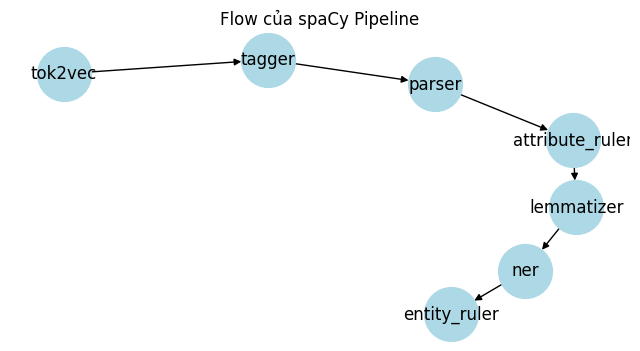

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

pipe_names = nlp.pipe_names

# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các node (các thành phần trong pipeline)
for comp in pipe_names:
    G.add_node(comp)

# Kết nối các node theo thứ tự trong pipeline
for i in range(len(pipe_names) - 1):
    G.add_edge(pipe_names[i], pipe_names[i + 1])

# Vẽ đồ thị
plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G)  # Sử dụng layout kiểu spring layout
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    node_size=1500,
    node_color="lightblue",
    arrows=True,
)
plt.title("Flow của spaCy Pipeline")
plt.axis("off")
plt.show()


- complex patterns: List of Entities and Patterns (source: https://spacy.io/usage/rule-based-matching)

In [ ]:
# Import the requisite library
import spacy

# Sample text
text = "This is a sample number (555) 555-5555."

# Build upon the spaCy Small Model
nlp = spacy.blank("en")

# Create the Ruler and Add it
ruler = nlp.add_pipe("entity_ruler")

# List of Entities and Patterns (source: https://spacy.io/usage/rule-based-matching)
patterns = [
    {
        "label": "PHONE_NUMBER",
        "pattern": [
            {"ORTH": "("},
            {"SHAPE": "ddd"},
            {"ORTH": ")"},
            {"SHAPE": "ddd"},
            {"ORTH": "-", "OP": "?"},
            {"SHAPE": "dddd"},
        ],
    }
]
# add patterns to ruler
ruler.add_patterns(patterns)


# create the doc
doc = nlp(text)

# extract entities
for ent in doc.ents:
    print(ent.text, ent.label_)

(555) 555-5555 PHONE_NUMBER


#### Khác nhau với EntityRuler
| **Tiêu chí**           | **Matcher**                                                                                                                                                        | **EntityRuler**                                                                                                                                                             |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Mục đích sử dụng**   | - Tìm kiếm các mẫu (pattern) bất kỳ trong văn bản.  <br>- Trả về vị trí (start, end) của các token khớp với mẫu để xử lý thêm.                                    | - Nhận diện thực thể có tên (named entities) thông qua các mẫu xác định.  <br>- Gán nhãn thực thể (entity label) và tích hợp vào `doc.ents` của tài liệu.           |
| **Tích hợp với pipeline** | - Hoạt động độc lập. <br>- Chỉ trả về danh sách kết quả khớp mà không thay đổi cấu trúc dữ liệu của văn bản.                                                        | - Được tích hợp vào pipeline của spaCy. <br>- Thêm các thực thể nhận diện vào `doc.ents`, hỗ trợ các bước xử lý tiếp theo như phân loại hay trích xuất thông tin.    |
| **Cách định nghĩa mẫu** | - Sử dụng cú pháp mẫu dựa trên các thuộc tính của token (ví dụ: `"LOWER": "apple"`). <br>- Mẫu chủ yếu nhằm mục đích tìm kiếm và xác định vị trí.                     | - Sử dụng cú pháp mẫu tương tự, nhưng mẫu còn kèm theo nhãn thực thể (ví dụ: `"label": "ORG"`). <br>- Mẫu không chỉ xác định vị trí mà còn cung cấp thông tin thực thể. |
| **Ứng dụng**           | - Phù hợp khi cần phát hiện cấu trúc ngôn ngữ phức tạp hoặc các mẫu đặc thù không nhất thiết là thực thể. <br>- Hỗ trợ các tác vụ như phân tích cú pháp, trích xuất thông tin. | - Hữu ích để cải thiện nhận diện thực thể có tên trong các ứng dụng NLP. <br>- Dùng để thêm hoặc thay thế các thực thể mà mô hình NER mặc định có thể bỏ sót.         |


- **Matcher** chỉ tìm và in ra các đoạn văn bản chứa từ "Apple" mà không gán nhãn.

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

matcher = Matcher(nlp.vocab)
# Tìm các mẫu có từ "Apple"
pattern = [{"LOWER": "apple"}]
matcher.add("APPLE_PATTERN", [pattern])

matches = matcher(doc)
for match_id, start, end in matches:
    span = doc[start:end]
    print(f"Found match: {span.text}")


Found match: Apple


- **EntityRuler** sẽ gán nhãn "ORG" cho từ "Apple" và kết quả được lưu vào doc.ents.

In [ ]:
import spacy

# Tải mô hình ngôn ngữ
nlp = spacy.load("en_core_web_sm")

# Thêm EntityRuler vào pipeline bằng tên của component (spaCy sẽ tự khởi tạo EntityRuler)
ruler = nlp.add_pipe("entity_ruler")

# Định nghĩa mẫu cho thực thể có tên "ORG"
patterns = [{"label": "ORG", "pattern": "Apple"}]
ruler.add_patterns(patterns)

# Xử lý văn bản
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# In ra các thực thể được nhận diện
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")


Entity: Apple, Label: ORG
Entity: U.K., Label: GPE
Entity: $1 billion, Label: MONEY


### Custom pipeline component

![](https://course.spacy.io/pipeline.png)

- Make a function execute automatically when you call nlp
- Add your own metadata to documents and tokens
- Updating built-in attributes like `doc.ents`

In [66]:
# add by Language.component
import spacy
from spacy.language import Language

nlp = spacy.load("en_core_web_sm")


@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here

    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc


nlp.add_pipe("custom_component", first=True)
# nlp.add_pipe("custom_component", last=True) # (default) add to the end of the pipeline
# nlp.add_pipe("custom_component", first=True) # add to the beginning of the pipeline
# nlp.add_pipe("custom_component", before="ner") # add before the named component
# nlp.add_pipe("custom_component", after="ner") # add after the named component

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

# Process a text
doc = nlp("This is a sample text.")


Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Doc length: 6


In [ ]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)


# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [
        Span(doc, start, end, label="ANIMAL")
        for match_id, start, end in matches
    ]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


### Extension Attribute

#### Setting custom attributes

- Add custom metadata to documents, tokens and spans
- Accessible via the `._` property
```python
doc._.title = "My document"
token._.is_color = True
span._.has_color = False
```

- Attributes need to be registered on the global `Doc`, `Token` or `Span` using the `set_extension` method

```python
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)
```

#### Attribute extensions

In [68]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

#### Property extensions

- Define a **getter** and **an optional setter** function
- **Getter** only called when you retrieve the attribute value

> trong python, **getter** cho phép lấy giá trị của thuộc tính, trong khi **setter** cho phép thiết lập hoặc thay đổi giá trị của thuộc tính đó.

In [ ]:
from spacy.tokens import Token


# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors


# Định nghĩa hàm setter
def set_is_color(token, value):
    token._.is_color_flag = value


# Set extension on the Token with getter output value
# value of getter function will be used as default value
# value of setter function will be used to set the value of the extension attribute
Token.set_extension(
    "is_color", getter=get_is_color, setter=set_is_color, force=True
)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

True - blue


**Lưu ý:** Nếu bạn chỉ định một hàm `getter` mà không có `setter`, thuộc tính sẽ **chỉ có thể đọc và không thể ghi**. Việc sử dụng `getter` và `setter` trong spaCy giúp bạn kiểm soát và tùy chỉnh hành vi của các thuộc tính mở rộng một cách linh hoạt

In [2]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("en")


# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)


# Register the Doc property extension "has_number" with the getter get_has_number
Doc.set_extension("has_number", getter=get_has_number)

# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", doc._.has_number)

has_number: True


#### Method extensions

Create custom method (pass arguments, then execute function)

In [1]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("en")


# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc


# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


In [3]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("en")


# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return f"<{tag}>{span.text}</{tag}>"


# Register the Span method extension "to_html" with the method to_html
Span.set_extension("to_html", method=to_html)

# Process the text and call the to_html method on the span with the tag name "strong"
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html("strong"))

<strong>Hello world</strong>


In this exercise, you’ll combine custom extension attributes with the statistical predictions and create an attribute getter that returns a Wikipedia search URL if the span is a person, organization, or location.

- Complete the get_wikipedia_url getter so it only returns the URL if the span’s label is in the list of labels.
- Set the Span extension "wikipedia_url" using the getter get_wikipedia_url.
- Iterate over the entities in the doc and output their Wikipedia URL.

In [6]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")


def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_").lower()
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text


# Set the Span extension wikipedia_url using the getter get_wikipedia_url
Span.set_extension("wikipedia_url", getter=get_wikipedia_url, force=True)

doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=david_bowie


A phrase matcher with all countries is available as the variable `matcher`. A dictionary of countries mapped to their capital cities is available as the variable `CAPITALS`.

In [ ]:
import json
import spacy
from spacy.language import Language
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json", encoding="utf8") as f:
    CAPITALS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", list(nlp.pipe(COUNTRIES)))


@Language.component("countries_component")
def countries_component_function(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [
        Span(doc, start, end, label="GPE") for match_id, start, end in matches
    ]
    return doc


# Add the component to the pipeline
nlp.add_pipe("countries_component")
print(nlp.pipe_names)


# Getter that looks up the span text in the dictionary of country capitals
def get_capital(span):
    return CAPITALS.get(span.text)


# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

### Scaling and performance

#### large volumes of text

In case there are a lot of text objects:

- Use `nlp.pipe` method
- Processes texts as a stream, yields Doc objects
- Much faster than calling `nlp` on each text

In [ ]:
LOTS_OF_TEXTS = [
    "Text 1.",
    "Text 2.",
    "Text 3.",
]

# do not use: docs = [nlp(text) for text in LOTS_OF_TEXTS]
docs = list(nlp.pipe(LOTS_OF_TEXTS))


**Passing in context**

- Setting `as_tuples=True` on `nlp.pipe` lets you pass in **(text, context)** tuples
- Yields **(doc, context)** tuples
- Useful for associating metadata with the doc

In [9]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, "---", context["page_number"])

This is a text --- 15
And another text --- 16


- set context attributes

In [10]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

#### Use only the tokenizer

You only need the tokenizer for one particular text, don't run the whole pipeline!

![alt text](https://course.spacy.io/pipeline.png)

- Use `nlp.make_doc` to turn **a text into a Doc object** --> turns the text into a doc before the pipeline components are called
```python
doc = nlp.make_doc("Hello world!")
```


In [12]:
doc = nlp.make_doc("This is a text")
doc[0]

This

#### Disabling pipeline components

- Use `nlp.select_pipes` to temporarily **disable one or more pipes**, then only runs the remaining components and restores them after the `with` block


In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "David love coffee."

# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

(David,)


## Training with neural network

### Training and updating models

**1. We need to update the model:**

spaCy có sẵn các mô hình (models) được huấn luyện trước trên nhiều ngôn ngữ. Tuy nhiên, các mô hình này chỉ được huấn luyện trên dữ liệu tổng quát, chưa được tối ưu cho một lĩnh vực hoặc bài toán cụ thể của bạn.

- Better results on your specific domain, Dữ liệu bạn làm việc có đặc thù riêng (ví dụ: y tế, tài chính, luật, kỹ thuật).
- Learn classification schemes specifically for your problem
- Essential for text classification
- Thêm các thực thể mới hoặc cải thiện độ chính xác nhận dạng thực thể hiện tại.
- Very useful for named entity recognition, Muốn cải thiện độ chính xác của nhận dạng thực thể (NER), phân loại văn bản, tagging POS,... trên dữ liệu cụ thể của bạn.
- Less critical for part-of-speech tagging and dependency parsing

**2. How to train**

![](https://course.spacy.io/training.png)

- **Training data**: Examples and their annotations. 
- **Text**: The input text the model should predict a label for. The text should be a sentence, paragraph or longer document. For the best results, it should be similar to what the model will see at runtime.
- **Label**: The label the model should predict. This can be a **text category**, or an **entity span** and **its type**.
- **Gradient**: How to change the weights.

**Note:**
- Dữ liệu càng nhiều, càng chính xác (ít nhất vài trăm mẫu để mô hình tốt).
- Nhãn thực thể cần nhất quán và chính xác (kiểm tra kỹ start-end positions).
- Nên train model trên GPU nếu dữ liệu lớn (pip install spacy[cuda]).

**3. Training Workflow**
1. Chuẩn bị dữ liệu + Chuyển đổi dữ liệu → DocBin
2. Split dữ liệu train/dev/test
3. Viết cấu hình training (config.cfg)
4. Training model (CLI)
5. Đánh giá model (Evaluation)
6. Lưu và package model
7. Sử dụng model trong production

#### Chuẩn bị dữ liệu

Use `DocBin`: là một cấu trúc dữ liệu đặc biệt trong spaCy, dùng để lưu trữ hiệu quả một tập hợp các đối tượng Doc. DocBin giúp tiết kiệm bộ nhớ, tăng tốc độ đọc ghi, và đặc biệt hữu ích khi bạn làm việc với các tập dữ liệu lớn, nhiều tài liệu để training hoặc đánh giá mô hình NLP trong spaCy.
- **Tiết kiệm bộ nhớ**: DocBin nén dữ liệu một cách tối ưu, giảm dung lượng lưu trữ đáng kể.
- **Tăng tốc training**: Khi bạn có lượng dữ liệu lớn, DocBin giúp việc load dữ liệu nhanh hơn rất nhiều.
- **Dễ dàng lưu trữ & chia sẻ**: Bạn có thể xuất dữ liệu training ra file nhị phân .spacy để chia sẻ hoặc tái sử dụng một cách dễ dàng.

**DocBin** chỉ lưu các dữ liệu cần thiết (như text, entities), các thông tin khác không được lưu theo mặc định.

In [36]:
DATA = [
    ("Tôi muốn mua iPhone 15 Pro Max", {"entities": [(13, 30, "PRODUCT")]}),
    ("Galaxy S24 Ultra có camera tốt", {"entities": [(0, 16, "PRODUCT")]}),
    ("Macbook Pro M2 có giá cao", {"entities": [(0, 14, "PRODUCT")]}),
    ("Tôi thích Samsung Galaxy S24", {"entities": [(10, 28, "PRODUCT")]}),
    ("Mua Macbook Air M2 ở đâu tốt?", {"entities": [(4, 18, "PRODUCT")]}),
]

In [37]:
import spacy
from spacy.tokens import DocBin

nlp = spacy.blank("vi")  # Dùng model blank để tạo Doc

doc_bin = DocBin()

for text, annotations in DATA:
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in annotations["entities"]:
        # Hàm char_span trả về None nếu span không khớp ký tự, cần xử lý kỹ bước này.
        span = doc.char_span(start, end, label=label)
        if span is None:
            print("Skipping entity:", text[start:end])
        else:
            ents.append(span)
    doc.ents = ents
    doc_bin.add(doc)

# Lưu ra file để training
doc_bin.to_disk(r"contents\tools\dev_frameworks\spacy\data\data.spacy")

#### Split dữ liệu train/dev/test

In [38]:
from spacy.tokens import DocBin
import random

train_ratio = 0.8
train_size = int(len(DATA) * train_ratio)
random.shuffle(DATA)
folder = r"contents\tools\dev_frameworks\spacy\data"

train_data = DATA[:train_size]
dev_data = DATA[train_size:]


def to_docbin(data, filename):
    doc_bin = DocBin()
    for text, annot in data:
        doc = nlp.make_doc(text)
        ents = [
            doc.char_span(start, end, label=label, alignment_mode="contract")
            for start, end, label in annotations["entities"]
        ]
        doc.ents = [span for span in ents if span]
        doc_bin.add(doc)
    doc_bin.to_disk(f"{folder}/{filename}")


to_docbin(train_data, "train.spacy")
to_docbin(dev_data, "dev.spacy")


#### Viết file config (config.cfg)

- single source of truth for all settings
- typically called `config.cfg`
- defines how to initialize the nlp object
- includes all settings about the pipeline components and their model implementations
- configures the training process and hyperparameters
- makes your training more reproducible

**Create `config.cfg` file**

```bash
python -m spacy init config config.cfg --lang vi --pipeline ner --optimize accuracy
```

- `init config`: the command to run
- `config.cfg`: output path for the generated config
- `--lang`: language class of the pipeline, e.g. en for English
- `--pipeline`: comma-separated names of components to include

**Giải thích các phần quan trọng trong config.cfg:**

```ini
# config.cfg
[nlp]
lang = "vi"
pipeline = ["ner"]

[components.ner]
factory = "ner"

[training]
optimizer = {"@optimizers":"Adam.v1"}
max_steps = 10000
dropout = 0.2
eval_frequency = 500
patience = 1000

[paths]
train = "./train.spacy"
dev = "./dev.spacy"

[corpora.train]
@readers = "spacy.Corpus.v1"
path = ${paths.train}

[corpora.dev]
@readers = "spacy.Corpus.v1"
path = ${paths.dev}

[system]
gpu_allocator = null
seed = 0

```

- [nlp]:
    - pipeline cần training (ner, textcat,...)
- [training]:
    - `max_steps`: số bước huấn luyện tối đa (ví dụ: 5000-20000).
    - `dropout`: tránh overfitting (từ 0.1 - 0.3)
    - `patience`: dừng sớm nếu không cải thiện sau X bước.
- [optimizer]:
    - thuật toán tối ưu: Adam hoặc SGD.
- [corpora]:
    - đường dẫn tới file train/dev (train.spacy, dev.spacy).

#### Training mô hình (CLI)

```bash
python -m spacy train config.cfg --output ./output --paths.train ./data/train.spacy --paths.dev ./data/dev.spacy
```
- `train`: the command to run
- `config.cfg`: the path to the config file
- `--output`: the path to the output directory to save the trained pipeline
- `--paths.train`: override with path to the training data
- `--paths.dev`: override with path to the evaluation data

Model tốt nhất tự động lưu vào `./output/model-best`, last trained model lưu vào `./output/model-last`

#### Đánh giá Model (Evaluation)

SpaCy tự động đánh giá trong quá trình training. Tuy nhien, muốn đánh giá riêng, dùng:

```bash
python -m spacy evaluate ./output/model-best ./data/dev.spacy --output metrics.json
```

Output Json include **Precision**, **Recall**, **F1-score**

#### Package Model

- Package model để tái sử dụng:
```bash
python -m spacy package ./output/model-best ./packages --name ner_vi --version 0.1.0
```

Bạn nhận được thư mục `packages/vi_ner_vi-0.1.0`, chứa `setup.py`.

- Cài model vào môi trường production nhanh gọn bằng:

```bash
pip install ./packages/vi_ner_vi-0.1.0/dist/vi_ner_vi-0.1.0.tar.gz
```


#### Load model

In [39]:
import spacy

nlp = spacy.load("vi_ner_vi")

doc = nlp("Tôi thích điện thoại Samsung Galaxy S25 mới.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('thích điện thoại', 'PRODUCT'), ('Samsung Galaxy S25', 'PRODUCT'), ('mới.', 'PRODUCT')]


### Configuring and running the training

### Training best practice